In [1]:
%matplotlib inline
# packages to load 
# Check the versions of libraries
# Python version
import warnings
warnings.filterwarnings('ignore')
import sys
import random

print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import csv
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import random as rn
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras import initializers

import math

TRAIN_FILE_PATH = "data/X_train.csv"
TARGET_FILE_PATH =  "data/y_train.csv"
TEST_FILE_PATH = "data/X_test.csv"

seed=42
np.random.seed(seed)
rn.seed(seed)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)



# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(seed)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)



Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
scipy: 1.1.0


Using TensorFlow backend.


In [2]:
#Load train and test set

train_data = pd.read_csv(TRAIN_FILE_PATH)
train_data.drop("id", axis=1, inplace=True)

Y_train = pd.read_csv(TARGET_FILE_PATH)
Y_train.drop("id", axis=1, inplace = True)

test_data =  pd.read_csv(TEST_FILE_PATH)
id_test = test_data.columns[0]
test_data.drop("id", axis=1, inplace=True)

In [3]:
#Zero mean unit variance for train and test data
def scale_data_vs_all(train, test):
    
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)

    scaler = StandardScaler().fit(train_data, Y_train)
    train = scaler.transform(train)
    test = scaler.transform(test)
   
    return train, test
    
def scale_data(train, test):
    
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    
    scaler = StandardScaler().fit(train, Y_train)
    train = scaler.transform(train)
    test = scaler.transform(test)
   
    return train, test

def generate_train_features_subset(X_high_dimensions, subset_indices):
    
    X_train_subset = X_high_dimensions[X_high_dimensions.columns[subset_indices]]    
    return X_train_subset

def generate_random_numbers(total_n, min_range, max_range):
    
    random_numbers = list(random.sample(range(min_range, max_range), total_n))
    #i = 0
    #for i in range(total_n):
    #    random_numbers.append(random.sample(range(1, 100), 3)random.randint(min_range,max_range))
    return random_numbers


In [4]:
def make_submission(filename, predictions):
    test_data =  pd.read_csv(TEST_FILE_PATH)
    test_data["y"] = predictions
    test_data[["id", "y"]].to_csv("submissions/"+filename, index= False)

In [5]:
X_train_scaled, X_test_scaled = scale_data(train_data, test_data)

Train shape:  (4800, 1000)
Test shape:  (4100, 1000)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
# fix random seed for reproducibility

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Y = Y_train
dropout = 0.1
#print(Y)
# create model
model = Sequential()
model.add(Dense(100, input_dim=1000, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(100, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(100, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(100, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(100, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(100, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(100, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(100, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))

model.add(Dense(1, init='RandomUniform'))
# Compile model
optimizer = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=["accuracy"])
# Fit the model
model.fit(x=X_train_scaled, y=Y, epochs=80, verbose=2, validation_split=0.1, shuffle=True, steps_per_epoch=50, initial_epoch=0, validation_steps=5)
# calculate predictions
print(X_test_subset)
predictions = model.predict(X_test_subset)
# round predictions
#ages = [x*100 for x in predictions]
#predictions = predictions*100
print(predictions)

/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=1000, kernel_regularizer=<keras.reg..., kernel_initializer="RandomUniform")`
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=72, kernel_regularizer=<keras.reg..., kernel_initializer="RandomUniform")`
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=72, kernel_regularizer=<keras.reg..., kernel_initializer="RandomUniform")`
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=72, kernel_regularizer=<keras.reg..., kernel_initializer="RandomUniform")`
/home/francesco/anaconda3/lib/python3.6/site-packages/ipyk

Train on 4320 samples, validate on 480 samples
Epoch 1/80
 - 8s - loss: 12.3920 - acc: 0.5420 - val_loss: 0.4991 - val_acc: 0.7458
Epoch 2/80
 - 6s - loss: 0.3064 - acc: 0.7505 - val_loss: 0.2559 - val_acc: 0.7458
Epoch 3/80
 - 6s - loss: 0.2517 - acc: 0.7505 - val_loss: 0.2542 - val_acc: 0.7458
Epoch 4/80
 - 6s - loss: 0.2512 - acc: 0.7505 - val_loss: 0.2542 - val_acc: 0.7458
Epoch 5/80
 - 6s - loss: 0.2512 - acc: 0.7505 - val_loss: 0.2542 - val_acc: 0.7458
Epoch 6/80
 - 6s - loss: 0.2512 - acc: 0.7505 - val_loss: 0.2542 - val_acc: 0.7458
Epoch 7/80
 - 6s - loss: 0.2513 - acc: 0.7505 - val_loss: 0.2542 - val_acc: 0.7458
Epoch 8/80
 - 6s - loss: 0.2511 - acc: 0.7505 - val_loss: 0.2542 - val_acc: 0.7458
Epoch 9/80
 - 6s - loss: 0.2509 - acc: 0.7505 - val_loss: 0.2542 - val_acc: 0.7458
Epoch 10/80
 - 6s - loss: 0.2508 - acc: 0.7505 - val_loss: 0.2542 - val_acc: 0.7458
Epoch 11/80
 - 6s - loss: 0.2509 - acc: 0.7505 - val_loss: 0.2542 - val_acc: 0.7458
Epoch 12/80
 - 6s - loss: 0.2509 - ac

In [238]:
X_train_ensembles = []
X_test_ensembles = []

X_train_0_1_ensembles = []
X_train_0_2_ensembles = []
X_train_1_2_ensembles = []

total_ensembles = 21
n_features = 400
min_range = 0
max_range = 999

for i in range(total_ensembles):
    subset_indices = generate_random_numbers(n_features, min_range, max_range)
    X_train_ensemble = generate_train_features_subset(train_data, subset_indices)
    X_test_ensemble = generate_train_features_subset(test_data, subset_indices)
    X_train_ensemble_scaled, X_test_ensemble_scaled= scale_data(X_train_ensemble, X_test_ensemble)
    X_train_ensembles.append(X_train_ensemble_scaled)
    X_test_ensembles.append(X_test_ensemble_scaled)
    
    X_train_0_1_ensemble = X_train_ensemble.ix[indices_0_1]
    X_train_0_1_ensemble_scaled, X_test_ensemble_scaled= scale_data(X_train_0_1_ensemble, X_test_ensemble)
    X_train_0_1_ensembles.append(X_train_0_1_ensemble_scaled)
    
    X_train_0_2_ensemble = X_train_ensemble.ix[indices_0_2]
    X_train_0_2_ensemble_scaled, X_test_ensemble_scaled= scale_data(X_train_0_2_ensemble, X_test_ensemble)
    X_train_0_2_ensembles.append(X_train_0_2_ensemble_scaled)

    X_train_1_2_ensemble = X_train_ensemble.ix[indices_1_2]
    X_train_1_2_ensemble_scaled, X_test_ensemble_scaled= scale_data(X_train_1_2_ensemble, X_test_ensemble)
    X_train_1_2_ensembles.append(X_train_1_2_ensemble_scaled)



Train shape:  (4800, 400)
Test shape:  (4100, 400)
Train shape:  (4200, 400)
Test shape:  (4100, 400)
        y
1     0.0
6     2.0
10    0.0
12    0.0
15    0.0
21    2.0
23    0.0
24    0.0
25    0.0
43    2.0
50    0.0
73    0.0
75    2.0
79    2.0
83    2.0
85    2.0
92    0.0
93    0.0
94    2.0
96    0.0
97    0.0
99    0.0
107   2.0
111   0.0
118   0.0
123   0.0
124   2.0
131   2.0
134   2.0
141   0.0
...   ...
4674  0.0
4681  2.0
4682  2.0
4683  2.0
4684  0.0
4690  0.0
4696  2.0
4697  2.0
4699  0.0
4702  0.0
4713  2.0
4715  2.0
4716  0.0
4728  2.0
4730  2.0
4743  2.0
4744  2.0
4747  2.0
4748  0.0
4768  2.0
4773  0.0
4777  2.0
4781  0.0
4782  2.0
4783  0.0
4790  2.0
4791  0.0
4794  0.0
4798  0.0
4799  0.0

[1200 rows x 1 columns]
Train shape:  (1200, 400)
Test shape:  (4100, 400)
Train shape:  (4200, 400)
Test shape:  (4100, 400)
Train shape:  (4800, 400)
Test shape:  (4100, 400)
Train shape:  (4200, 400)
Test shape:  (4100, 400)
        y
1     0.0
6     2.0
10    0.0
12    0.0

Train shape:  (4200, 400)
Test shape:  (4100, 400)
Train shape:  (4800, 400)
Test shape:  (4100, 400)
Train shape:  (4200, 400)
Test shape:  (4100, 400)
        y
1     0.0
6     2.0
10    0.0
12    0.0
15    0.0
21    2.0
23    0.0
24    0.0
25    0.0
43    2.0
50    0.0
73    0.0
75    2.0
79    2.0
83    2.0
85    2.0
92    0.0
93    0.0
94    2.0
96    0.0
97    0.0
99    0.0
107   2.0
111   0.0
118   0.0
123   0.0
124   2.0
131   2.0
134   2.0
141   0.0
...   ...
4674  0.0
4681  2.0
4682  2.0
4683  2.0
4684  0.0
4690  0.0
4696  2.0
4697  2.0
4699  0.0
4702  0.0
4713  2.0
4715  2.0
4716  0.0
4728  2.0
4730  2.0
4743  2.0
4744  2.0
4747  2.0
4748  0.0
4768  2.0
4773  0.0
4777  2.0
4781  0.0
4782  2.0
4783  0.0
4790  2.0
4791  0.0
4794  0.0
4798  0.0
4799  0.0

[1200 rows x 1 columns]
Train shape:  (1200, 400)
Test shape:  (4100, 400)
Train shape:  (4200, 400)
Test shape:  (4100, 400)
Train shape:  (4800, 400)
Test shape:  (4100, 400)
Train shape:  (4200, 400)
Test shape:  (4100, 400

Train shape:  (4200, 400)
Test shape:  (4100, 400)


In [223]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn import svm


def train_BRFC(X_train,Y_train,X_test):

    BMAC = []

    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
    for train, test in kfold.split(X_train, Y_train.values):
        X = X_train[train]
        Y = Y_train.values[train]
        model = BalancedRandomForestClassifier(n_estimators=100, random_state=seed)
        #rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
        #                          random_state=0)

        #pipeline = make_pipeline(rt, model)
        #pipeline.fit(X, Y)
        #y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
        model.fit(X, Y)
    
        plt.plot((-1*np.sort(-1*np.asarray(model.feature_importances_))))
    
        X_val = X_train[test]
        Y_true = Y_train.values[test]
        Y_pred = model.predict(X_val)

        # Summary of the predictions made by the classifier
        #print(classification_report(X_test, Y_pred))
        #print(confusion_matrix(Y_test, Y_pred))
        # Accuracy score
        cur_BMAC = balanced_accuracy_score(Y_true, Y_pred)
        print(cur_BMAC)
        BMAC.append(cur_BMAC)
    
    print("AVG: BMAC score: %.4f (+/- %.4f)" % (np.mean(BMAC), np.std(BMAC)))
    model = BalancedRandomForestClassifier(n_estimators=100, random_state=seed)
    model.fit(X_train, Y_train.values) # train on all data
    pred = model.predict(X_test)
    #make_submission('nk_balanced_random_forest_classifier.csv', pred)
    return pred

In [216]:
from imblearn.ensemble import EasyEnsembleClassifier

BMAC = []

def train_EEC(X_train,Y_train,X_test):

    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
    for train, test in kfold.split(X_train, Y_train.values):
        X = X_train[train]
        Y = Y_train.values[train]
        model = EasyEnsembleClassifier(random_state=seed)
        model.fit(X, Y)
    
        X_val = X_train[test]
        Y_true = Y_train.values[test]
        Y_pred = model.predict(X_val)

        # Accuracy score
        cur_BMAC = balanced_accuracy_score(Y_true, Y_pred)
        #print(cur_BMAC)
        BMAC.append(cur_BMAC)
    
    print("AVG: BMAC score: %.4f (+/- %.4f)" % (np.mean(BMAC), np.std(BMAC)))
    pred = model.predict(X_test)
    #make_submission('nk_easy_ensemble_classifier.csv', pred)

All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6494444444444444


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6603703703703704
AVG: BMAC score: 0.6549 (+/- 0.0055)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7827777777777778


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.773611111111111
AVG: BMAC score: 0.7782 (+/- 0.0046)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7233333333333334


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.69
AVG: BMAC score: 0.7067 (+/- 0.0167)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8388888888888889


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8347222222222221
AVG: BMAC score: 0.8368 (+/- 0.0021)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  1
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6368518518518519


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6477777777777778
AVG: BMAC score: 0.6423 (+/- 0.0055)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7847222222222222


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7830555555555556
AVG: BMAC score: 0.7839 (+/- 0.0008)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7016666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7016666666666667
AVG: BMAC score: 0.7017 (+/- 0.0000)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.845


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8394444444444444
AVG: BMAC score: 0.8422 (+/- 0.0028)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  2
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6499999999999999


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6498148148148147
AVG: BMAC score: 0.6499 (+/- 0.0001)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7775000000000001


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7708333333333333
AVG: BMAC score: 0.7742 (+/- 0.0033)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7133333333333334


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7050000000000001
AVG: BMAC score: 0.7092 (+/- 0.0042)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8416666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8416666666666667
AVG: BMAC score: 0.8417 (+/- 0.0000)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  3
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6542592592592592


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6392592592592593
AVG: BMAC score: 0.6468 (+/- 0.0075)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7866666666666666


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7683333333333333
AVG: BMAC score: 0.7775 (+/- 0.0092)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7033333333333334


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.695
AVG: BMAC score: 0.6992 (+/- 0.0042)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.845


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8333333333333333
AVG: BMAC score: 0.8392 (+/- 0.0058)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  4
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.654074074074074


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6442592592592592
AVG: BMAC score: 0.6492 (+/- 0.0049)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7916666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7749999999999999
AVG: BMAC score: 0.7833 (+/- 0.0083)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7033333333333334


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7
AVG: BMAC score: 0.7017 (+/- 0.0017)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8427777777777778


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8316666666666667
AVG: BMAC score: 0.8372 (+/- 0.0056)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  5
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6524074074074074


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6594444444444444
AVG: BMAC score: 0.6559 (+/- 0.0035)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7902777777777779


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7775000000000001
AVG: BMAC score: 0.7839 (+/- 0.0064)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7016666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6983333333333334
AVG: BMAC score: 0.7000 (+/- 0.0017)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8488888888888889


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8369444444444445
AVG: BMAC score: 0.8429 (+/- 0.0060)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  6
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6531481481481481


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6524074074074074
AVG: BMAC score: 0.6528 (+/- 0.0004)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7744444444444445


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7708333333333333
AVG: BMAC score: 0.7726 (+/- 0.0018)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7183333333333333


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.71
AVG: BMAC score: 0.7142 (+/- 0.0042)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8505555555555555


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8413888888888889
AVG: BMAC score: 0.8460 (+/- 0.0046)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  7
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6529629629629629


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6349999999999999
AVG: BMAC score: 0.6440 (+/- 0.0090)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7919444444444445


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.77
AVG: BMAC score: 0.7810 (+/- 0.0110)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7066666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.71
AVG: BMAC score: 0.7083 (+/- 0.0017)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8441666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8383333333333334
AVG: BMAC score: 0.8413 (+/- 0.0029)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  8
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6588888888888889


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6433333333333334
AVG: BMAC score: 0.6511 (+/- 0.0078)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.78


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7719444444444444
AVG: BMAC score: 0.7760 (+/- 0.0040)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7216666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6966666666666667
AVG: BMAC score: 0.7092 (+/- 0.0125)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8400000000000001


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8388888888888888
AVG: BMAC score: 0.8394 (+/- 0.0006)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  9
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6522222222222221


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6338888888888888
AVG: BMAC score: 0.6431 (+/- 0.0092)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7875000000000001


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7669444444444444
AVG: BMAC score: 0.7772 (+/- 0.0103)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.715


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7033333333333334
AVG: BMAC score: 0.7092 (+/- 0.0058)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8497222222222223


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8355555555555556
AVG: BMAC score: 0.8426 (+/- 0.0071)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  10
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6350000000000001


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6344444444444445
AVG: BMAC score: 0.6347 (+/- 0.0003)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7952777777777778


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7813888888888889
AVG: BMAC score: 0.7883 (+/- 0.0069)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6916666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.685
AVG: BMAC score: 0.6883 (+/- 0.0033)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8438888888888889


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8302777777777778
AVG: BMAC score: 0.8371 (+/- 0.0068)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  11
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6635185185185185


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6305555555555556
AVG: BMAC score: 0.6470 (+/- 0.0165)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7983333333333333


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7838888888888889
AVG: BMAC score: 0.7911 (+/- 0.0072)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7033333333333334


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7166666666666667
AVG: BMAC score: 0.7100 (+/- 0.0067)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8480555555555556


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8436111111111111
AVG: BMAC score: 0.8458 (+/- 0.0022)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  12
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6605555555555557


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6438888888888888
AVG: BMAC score: 0.6522 (+/- 0.0083)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7877777777777778


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7716666666666667
AVG: BMAC score: 0.7797 (+/- 0.0081)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7183333333333333


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6933333333333334
AVG: BMAC score: 0.7058 (+/- 0.0125)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8358333333333334


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8447222222222222
AVG: BMAC score: 0.8403 (+/- 0.0044)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  13
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6659259259259259


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6381481481481481
AVG: BMAC score: 0.6520 (+/- 0.0139)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7783333333333333


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7791666666666667
AVG: BMAC score: 0.7788 (+/- 0.0004)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6983333333333334


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.715
AVG: BMAC score: 0.7067 (+/- 0.0083)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8466666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8308333333333333
AVG: BMAC score: 0.8387 (+/- 0.0079)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  14
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6522222222222221


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.637962962962963
AVG: BMAC score: 0.6451 (+/- 0.0071)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7841666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7711111111111111
AVG: BMAC score: 0.7776 (+/- 0.0065)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7050000000000001


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7066666666666667
AVG: BMAC score: 0.7058 (+/- 0.0008)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8416666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.841388888888889
AVG: BMAC score: 0.8415 (+/- 0.0001)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  15
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6483333333333333


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6485185185185185
AVG: BMAC score: 0.6484 (+/- 0.0001)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7880555555555555


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7730555555555556
AVG: BMAC score: 0.7806 (+/- 0.0075)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.71


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7016666666666667
AVG: BMAC score: 0.7058 (+/- 0.0042)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8433333333333334


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8341666666666667
AVG: BMAC score: 0.8388 (+/- 0.0046)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  16
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6555555555555556


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6381481481481481
AVG: BMAC score: 0.6469 (+/- 0.0087)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7819444444444444


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7702777777777778
AVG: BMAC score: 0.7761 (+/- 0.0058)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.72


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6933333333333334
AVG: BMAC score: 0.7067 (+/- 0.0133)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8483333333333334


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.831388888888889
AVG: BMAC score: 0.8399 (+/- 0.0085)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  17
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6587037037037037


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6257407407407407
AVG: BMAC score: 0.6422 (+/- 0.0165)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7930555555555556


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7727777777777778
AVG: BMAC score: 0.7829 (+/- 0.0101)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7216666666666667


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7033333333333334
AVG: BMAC score: 0.7125 (+/- 0.0092)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8391666666666666


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8372222222222222
AVG: BMAC score: 0.8382 (+/- 0.0010)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  18
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6648148148148149


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6407407407407407
AVG: BMAC score: 0.6528 (+/- 0.0120)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7863888888888889


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7783333333333333
AVG: BMAC score: 0.7824 (+/- 0.0040)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7
AVG: BMAC score: 0.7000 (+/- 0.0000)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8541666666666666


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8386111111111111
AVG: BMAC score: 0.8464 (+/- 0.0078)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  19
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6503703703703704


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.637962962962963
AVG: BMAC score: 0.6442 (+/- 0.0062)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7786111111111111


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.778888888888889
AVG: BMAC score: 0.7788 (+/- 0.0001)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6950000000000001


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7150000000000001
AVG: BMAC score: 0.7050 (+/- 0.0100)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8508333333333333


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8388888888888888
AVG: BMAC score: 0.8449 (+/- 0.0060)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  20
All vs all


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6564814814814816


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6433333333333333
AVG: BMAC score: 0.6499 (+/- 0.0066)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 vs all
1 vs 1


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7863888888888889


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7705555555555555
AVG: BMAC score: 0.7785 (+/- 0.0079)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7183333333333333


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7033333333333334
AVG: BMAC score: 0.7108 (+/- 0.0075)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8474999999999999


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8366666666666667
AVG: BMAC score: 0.8421 (+/- 0.0054)


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test ensemble number:  21


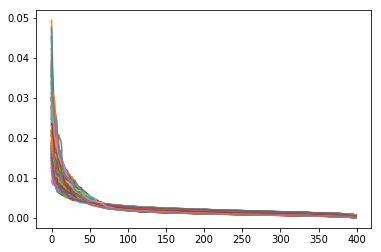

In [245]:
ensembles_predictions = []
ensembles_predictions_0_vs_all = []
ensembles_predictions_1_vs_all = []
ensembles_predictions_2_vs_all = []

ensembles_predictions_0_vs_1 = []
ensembles_predictions_0_vs_2 = []
ensembles_predictions_1_vs_2 = []

corr_test_ensemble = 0
for X_train in X_train_ensembles:
    X_test = X_test_ensembles[corr_test_ensemble]
    #all vs all
    print("All vs all")
    preds = train_BRFC(X_train = X_train,Y_train = Y_train, X_test = X_test)
    ensembles_predictions.append(preds)
    #1 vs all
    print("1 vs all")
    """preds_0_vs_all = train_BRFC(X_train = X_train,Y_train = Y_0_vs_all, X_test = X_test)
    ensembles_predictions_0_vs_all.append(preds_0_vs_all)
    preds_1_vs_all = train_BRFC(X_train = X_train,Y_train = Y_1_vs_all, X_test = X_test)
    ensembles_predictions_1_vs_all.append(preds_1_vs_all)
    preds_2_vs_all = train_BRFC(X_train = X_train,Y_train = Y_2_vs_all, X_test = X_test)
    ensembles_predictions_2_vs_all.append(preds_2_vs_all)"""
    #1 vs 1
    print("1 vs 1")
    preds_0_vs_1 = train_BRFC(X_train = X_train_0_1_ensembles[corr_test_ensemble],Y_train = Y_train_0_1, X_test = X_test)
    ensembles_predictions_0_vs_1.append(preds_0_vs_1)
    preds_0_vs_2 = train_BRFC(X_train = X_train_0_2_ensembles[corr_test_ensemble],Y_train = Y_train_0_2, X_test = X_test)
    ensembles_predictions_0_vs_2.append(preds_0_vs_2)
    preds_1_vs_2 = train_BRFC(X_train = X_train_1_2_ensembles[corr_test_ensemble],Y_train = Y_train_1_2, X_test = X_test)
    ensembles_predictions_1_vs_2.append(preds_1_vs_2)

    #preds = train_EEC(X_train = X_train,Y_train = Y_train, X_test = X_test)
    #ensembles_predictions.append(preds)
    corr_test_ensemble = corr_test_ensemble + 1
    print("Test ensemble number: ", corr_test_ensemble)
    

In [247]:
total_test_samples = test_data.shape[0]
final_enselmbles_predictions = []
for i in range(total_test_samples):
    final_enselmbles_predictions.append([0,0,0])

print(total_test_samples)
#print(ensembles_predictions)

for preds_ensemble in ensembles_predictions:
    pred_idx = 0
    for pred in preds_ensemble:
        final_enselmbles_predictions[pred_idx][int(pred)] = final_enselmbles_predictions[pred_idx][int(pred)] + 1
        pred_idx = pred_idx + 1

#1 vs all
for preds_ensemble in ensembles_predictions_0_vs_1:
    pred_idx = 0
    for pred in preds_ensemble:
        if pred == 1:
            #Class 0 has been predicted
            final_enselmbles_predictions[pred_idx][0] = final_enselmbles_predictions[pred_idx][0] + 1
        pred_idx = pred_idx + 1
for preds_ensemble in ensembles_predictions_1_vs_all:
    pred_idx = 0
    for pred in preds_ensemble:
        if pred == 1:
            #Class 1 has been predicted
            final_enselmbles_predictions[pred_idx][1] = final_enselmbles_predictions[pred_idx][1] + 1
        pred_idx = pred_idx + 1
for preds_ensemble in ensembles_predictions_2_vs_all:
    pred_idx = 0
    for pred in preds_ensemble:
        if pred == 1:
            #Class 2 has been predicted
            final_enselmbles_predictions[pred_idx][2] = final_enselmbles_predictions[pred_idx][2] + 1
        pred_idx = pred_idx + 1

#1 vs 1
for preds_ensemble in ensembles_predictions_0_vs_1:
    pred_idx = 0
    for pred in preds_ensemble:
        final_enselmbles_predictions[pred_idx][int(pred)] = final_enselmbles_predictions[pred_idx][int(pred)] + 1
        pred_idx = pred_idx + 1
for preds_ensemble in ensembles_predictions_0_vs_2:
    pred_idx = 0
    for pred in preds_ensemble:
        final_enselmbles_predictions[pred_idx][int(pred)] = final_enselmbles_predictions[pred_idx][int(pred)] + 1
        pred_idx = pred_idx + 1
for preds_ensemble in ensembles_predictions_1_vs_2:
    pred_idx = 0
    for pred in preds_ensemble:
        final_enselmbles_predictions[pred_idx][int(pred)] = final_enselmbles_predictions[pred_idx][int(pred)] + 1
        pred_idx = pred_idx + 1
        
        

print(final_enselmbles_predictions)

predictions = []
for vec_pred in final_enselmbles_predictions:
    predictions.append(np.argmax(vec_pred))


print("Here")
count_labels(predictions)

make_submission("BigEnsemble_allvsall_1vs1_400feats_21RFBC.csv",predictions)
#900 31 rbf
        
    
    

4100
[[43, 5, 36], [54, 25, 8], [42, 63, 0], [29, 63, 13], [21, 0, 63], [44, 24, 18], [37, 11, 37], [21, 0, 63], [42, 31, 21], [37, 63, 5], [58, 21, 5], [28, 55, 21], [21, 63, 21], [40, 63, 2], [40, 63, 2], [30, 9, 49], [51, 30, 12], [42, 63, 0], [40, 48, 15], [21, 0, 63], [29, 52, 22], [42, 63, 0], [40, 0, 44], [32, 63, 10], [53, 6, 25], [42, 63, 0], [42, 63, 0], [24, 0, 60], [42, 63, 0], [42, 63, 0], [21, 0, 63], [42, 63, 0], [42, 63, 0], [42, 63, 0], [42, 63, 0], [42, 63, 0], [42, 21, 21], [32, 63, 10], [42, 63, 0], [42, 63, 0], [21, 0, 63], [38, 39, 21], [42, 63, 0], [30, 63, 12], [42, 63, 0], [26, 0, 58], [26, 63, 16], [46, 38, 11], [25, 1, 59], [37, 63, 5], [42, 63, 0], [45, 53, 7], [42, 9, 33], [24, 0, 60], [57, 21, 6], [26, 0, 58], [41, 63, 1], [22, 0, 62], [42, 63, 0], [44, 61, 0], [21, 0, 63], [28, 0, 56], [41, 20, 29], [42, 63, 0], [42, 63, 0], [39, 63, 3], [42, 63, 0], [40, 63, 2], [28, 55, 21], [21, 0, 63], [42, 63, 0], [41, 63, 1], [35, 0, 49], [41, 63, 1], [40, 63, 2], [

Here
930
2196
930


In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

BMAC = []

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
for train, test in kfold.split(X_train_scaled, Y_train.values):
    X = X_train_scaled[train]
    Y = Y_train.values[train]
    model = EasyEnsembleClassifier(random_state=seed)
    model.fit(X, Y)
    
    X_test = X_train_scaled[test]
    Y_true = Y_train.values[test]
    Y_pred = model.predict(X_test)

    # Accuracy score
    cur_BMAC = balanced_accuracy_score(Y_true, Y_pred)
    print(cur_BMAC)
    BMAC.append(cur_BMAC)
    
print("AVG: BMAC score: %.4f (+/- %.4f)" % (np.mean(BMAC), np.std(BMAC)))
pred = model.predict(X_test_scaled)
#make_submission('nk_easy_ensemble_classifier.csv', pred)

In [213]:
#Separate samples w.r.t training labels in {0,1,2}

Y_train_0_idx = Y_train.index[Y_train['y'] == 0].tolist()
Y_train_1_idx = Y_train.index[Y_train['y'] == 1].tolist()
Y_train_2_idx = Y_train.index[Y_train['y'] == 2].tolist()

#Select the corresponding samples ad group them per label

#Y_train_1_idx = Y_train_1_idx[0:600]

Y_train_0 = Y_train.ix[Y_train_0_idx]
Y_train_1 = Y_train.ix[Y_train_1_idx]
Y_train_2 = Y_train.ix[Y_train_2_idx]

X_train_0 = train_data.ix[Y_train_0_idx]
X_train_1 = train_data.ix[Y_train_1_idx]
X_train_2 = train_data.ix[Y_train_2_idx]

print("\nClass 0")
print(X_train_0.shape)
print(Y_train_0.shape)
"""print("Mean: ", list(X_train_0.mean()))"""

print("\nClass 1")
print(X_train_1.shape)
print(Y_train_1.shape)
"""print("Mean: ", list(X_train_1.mean()))"""

print("\nClass 2")
print(X_train_2.shape)
print(Y_train_2.shape)
"""print("Mean: ", list(X_train_2.mean()))"""


#Select samples by group of two labels

indices_0_1 = list(np.union1d(Y_train_0_idx, Y_train_1_idx))
X_train_0_1 = train_data.ix[indices_0_1]
Y_train_0_1 = Y_train.ix[indices_0_1]

indices_0_2 = list(np.union1d(Y_train_0_idx, Y_train_2_idx))
X_train_0_2 = train_data.ix[indices_0_2]
Y_train_0_2 = Y_train.ix[indices_0_2]

indices_1_2 = list(np.union1d(Y_train_1_idx, Y_train_2_idx))
X_train_1_2 = train_data.ix[indices_1_2]
Y_train_1_2 = Y_train.ix[indices_1_2]

#Print and scale data w.r.t the overall train data statistics (mean and covariance)
print("\nClass 0 & 1")
print(X_train_0_1.shape)
print(Y_train_0_1.shape)
X_train_0_1_scaled, X_test_scaled = scale_data_vs_all(X_train_0_1, test_data)

print("\nClass 0 & 2")
print(X_train_0_2.shape)
print(Y_train_0_2.shape)
X_train_0_2_scaled, X_test_scaled = scale_data_vs_all(X_train_0_2, test_data)

print("\nClass 1 & 2")
print(X_train_1_2.shape)
print(Y_train_1_2.shape)
X_train_1_2_scaled, X_test_scaled = scale_data_vs_all(X_train_1_2, test_data)


Y_0_vs_all = Y_train.copy()
Y_0_vs_all.ix[Y_train_0_idx] = 1
Y_0_vs_all.ix[Y_train_1_idx] = 0
Y_0_vs_all.ix[Y_train_2_idx] = 0

Y_1_vs_all = Y_train.copy()
Y_1_vs_all.ix[Y_train_0_idx] = 0
Y_1_vs_all.ix[Y_train_1_idx] = 1
Y_1_vs_all.ix[Y_train_2_idx] = 0

Y_2_vs_all = Y_train.copy()
Y_2_vs_all.ix[Y_train_0_idx] = 0
Y_2_vs_all.ix[Y_train_1_idx] = 0
Y_2_vs_all.ix[Y_train_2_idx] = 1

print("\nClass 0 vs all")
print(Y_0_vs_all.shape)

print("\nClass 1 vs all")
print(Y_1_vs_all.shape)

print("\nClass 2 vs all")
print(Y_2_vs_all.shape)




Class 0
(600, 1000)
(600, 1)

Class 1
(3600, 1000)
(3600, 1)

Class 2
(600, 1000)
(600, 1)

Class 0 & 1
(4200, 1000)
(4200, 1)
Train shape:  (4200, 1000)
Test shape:  (4100, 1000)

Class 0 & 2
(1200, 1000)
(1200, 1)
Train shape:  (1200, 1000)
Test shape:  (4100, 1000)

Class 1 & 2
(4200, 1000)
(4200, 1)
Train shape:  (4200, 1000)
Test shape:  (4100, 1000)

Class 0 vs all
(4800, 1)

Class 1 vs all
(4800, 1)

Class 2 vs all
(4800, 1)


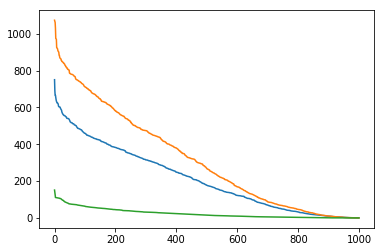

In [32]:
# 1 vs 1 philosophy
#Extract the features to use with f_classification

n_features_fc = 400

features_l01_idx = f_classif(X_train_0_1_scaled, Y_train_0_1)[0]
features_l12_idx = f_classif(X_train_1_2_scaled, Y_train_1_2)[0]
features_l02_idx = f_classif(X_train_0_2_scaled, Y_train_0_2)[0]


f_l01_list = np.asarray(list(features_l01_idx))
f_l12_list = np.asarray(list(features_l12_idx))
f_l02_list = np.asarray(list(features_l02_idx))


plt.plot(-1*np.sort(-1*f_l01_list)); 
plt.plot(-1*np.sort(-1*f_l12_list)); 
plt.plot(-1*np.sort(-1*f_l02_list)); 

indices_fc_0_vs_1 = f_l01_list.argsort()[-n_features_fc:][::-1]
indices_fc_1_vs_2 = f_l12_list.argsort()[-n_features_fc:][::-1]
indices_fc_0_vs_2 = f_l02_list.argsort()[-n_features_fc:][::-1]

#indices = f_list.argsort()[-n_features_fc:][::-1]

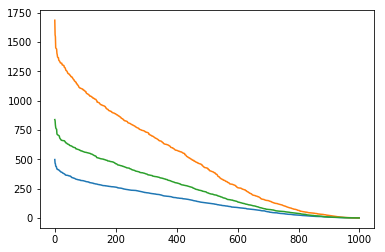

In [33]:
# 1 vs all philosophy
#Extract the features to use with f_classification

n_features_fc = 400


features_scores_0_vs_all = f_classif(X_train_scaled, Y_0_vs_all)[0]
features_scores_1_vs_all = f_classif(X_train_scaled, Y_1_vs_all)[0]
features_scores_2_vs_all = f_classif(X_train_scaled, Y_2_vs_all)[0]

#print(features_scores)
f_l0_vs_all = np.asarray(list(features_scores_0_vs_all))
f_l1_vs_all = np.asarray(list(features_scores_1_vs_all))
f_l2_vs_all = np.asarray(list(features_scores_2_vs_all))

plt.plot(-1*np.sort(-1*f_l0_vs_all), label='Labels 0 vs all'); #Hardest
plt.plot(-1*np.sort(-1*f_l1_vs_all), label='Labels 1 vs all');
plt.plot(-1*np.sort(-1*f_l2_vs_all), label='Labels 2 vs all');

indices_fc_0_vs_all = f_l0_vs_all.argsort()[-n_features_fc:][::-1]
indices_fc_1_vs_all = f_l1_vs_all.argsort()[-n_features_fc:][::-1]
indices_fc_2_vs_all = f_l2_vs_all.argsort()[-n_features_fc:][::-1]


In [37]:
idx_inters_0all_02 = list(set(indices_fc_0_vs_all).intersection(indices_fc_0_vs_2)) #Hardest, better make sure best features are in the selcted ones
idx_union_0all_02 = list(set(indices_fc_0_vs_all).union(indices_fc_0_vs_2))

print(len(idx_inters_0all_02))
print(len(idx_union_0all_02))

idx_union_0all_1all_02 = list(set(idx_union_0all_02).union(indices_fc_1_vs_all))
print(len(idx_union_0all_1all_02))

idx_union_0all_1all_2all_02 = list(set(idx_union_0all_1all_02).union(indices_fc_2_vs_all))
print(len(idx_union_0all_1all_2all_02))

197
603
605
608


In [41]:
indices = idx_union_0all_1all_2all_02

X_train_subset = train_data[train_data.columns[indices]]
X_test_subset = test_data[train_data.columns[indices]]

print("Shape of the train data after feature selection: ", X_train_subset.shape)
print("Shape of the test data after feature selection: ", X_test_subset.shape)

X_train_subset_scaled, X_test_subset_scaled = scale_data(X_train_subset, X_test_subset)

Shape of the train data after feature selection:  (4800, 608)
Shape of the test data after feature selection:  (4100, 608)
Train shape:  (4800, 608)
Test shape:  (4100, 608)
